In [285]:
import pandas as pd
import numpy as np
import chardet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [286]:
#Parameters
author_label_name = "username"
file_name = "authorship_dataset.csv"

In [287]:
#Print unique authors and length of dataset
def print_info_df(data,label):
    print("The author dataset contains {} datapoints.".format(len(data)))
    print("There are {} unique authors.".format(len(data[label].unique())))

In [288]:
#Print statistics
def get_stats(var):
    print("Min:", np.min(var))
    print("Max:", np.max(var))
    print("Mean:", np.mean(var))
    print("Median", np.median(var))
    print("1st percentile", np.percentile(var, 1))
    print("95th percentile", np.percentile(var, 95))
    print("99th percentile", np.percentile(var, 99))
    print("99.5th Percentile", np.percentile(var, 99.5))
    print("99.9th Percentile", np.percentile(var, 99.9))

In [289]:
#Plot sns displot
def plot_snsplot(array,title,xlabel,ylabel,save_file_name):
    sns.distplot(array, kde = False, bins = 70, color = 'blue').set_title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(0, 100)
    plt.savefig(save_file_name)


In [290]:
#Gets word count, character count and average length of texts
def getTextMetaInformation(data,label):
    word_count = []
    char_count = []

    text = list(data[label].values)
    for i in range(len(text)):
        word_count.append(len(text[i].split()))
        char_count.append(len(text[i]))

    # Convert lists to numpy arrays
    word_count = np.array(word_count)
    char_count = np.array(char_count)

    # Calculate average word lengths
    ave_length = np.array(char_count)/np.array(word_count)
    return word_count, char_count, ave_length

In [291]:
#Get outlier indexes 
def get_outlier_indexes(count,size,type):
    if(type=="less"):
        outliers_indexes = np.where(count < size)
    elif(type=="greater"):
        outliers_indexes = np.where(count > size)

    return outliers_indexes

In [292]:
#print unique character counts
def print_unique_character_counts(text):
    text_string = ''

    for i in range(len(text)):
        text_string += text[i].lower()

    # Get character frequencies
    char_cnt = Counter(text_string)
    print(char_cnt)
    print(len(char_cnt))
    return char_cnt

In [293]:
# Find all texts containing unusual characters
def find_character_list_count(text,character_list):
    matching_text = []
    for i in range(len(text)):
        for j in text[i]:
            if j in character_list:
                matching_text.append(i)
        
    matching_text = list(set(matching_text))
    print('There are', str(len(matching_text)), 'texts containing the characters provided.')
    return matching_text




In [294]:
# Remove invalid characters from text
def remove_character_from_text(text,remove_characters):
    for char in remove_characters:
            text = [excerpt.replace(char, '') for excerpt in text]
    return text

In [295]:
#Remove blocks of white space
def remove_block_of_white_space(text):
    new_text = []
    for excerpt in text:
        while "  " in excerpt:
            excerpt = excerpt.replace("  "," ")
        new_text.append(excerpt)
    print(len(text))
    return new_text


In [296]:
#Count text with particular string
def count_text_with_string(text,string_value):
    count= text.str.count(string_value).sum()
    return count


In [297]:
#Remove punctuation
def remove_punctuation(text):
    new_text = []
    for i in range(len(text)):
        new = text[i].lower()
        new = new.translate(str.maketrans('','', string.punctuation))
        new = new.replace('“', '').replace('”', '')
        new_text.append(new)
    print(len(new_text))

    return new_text

In [298]:
#Make text lower case
def make_text_lower(text):
    new_text = []
    for i in range(len(text)):
        new = text[i].lower()
        new_text.append(new)
    print(len(new_text))
    return new_text
    

In [299]:
#Remove text with substrings
def remove_text_with_substring(data,text,substring):
    df = data[text.str.contains(substring) == False]
    return df


In [300]:
data = pd.read_csv(file_name)

In [301]:
#There are 23 unique authors
print_info_df(data,author_label_name)

The author dataset contains 63019 datapoints.
There are 23 unique authors.


In [302]:
# Create feature (text) and label (author) lists
text = list(data['raw_text'].values)
author = list(data['username'].values)

In [303]:
Counter(author)

Counter({' 0laotan': 3222,
         ' 9jatrendstarter': 3186,
         ' alanalanae': 3199,
         ' Alekiesui': 3173,
         ' AllAboutCaity': 3142,
         ' AlmaLizzR': 2397,
         ' AlresfordBear': 3226,
         ' alxsleazy': 3168,
         ' IncrediblePeeps': 2520,
         ' snash883': 3179,
         ' TAKEBACKOCH': 3216,
         ' tia': 148,
         ' triangleDAYS': 3246,
         ' Trinahenk75': 2256,
         ' uplifting': 3246,
         ' violet': 3168,
         ' vousmevoyez': 3208,
         ' vsurywanshi87': 3213,
         ' Watswidthename': 1383,
         ' watt': 3195,
         ' XylariaVG': 3200,
         ' yungbbygirlhoks': 3124,
         nan: 4})

In [304]:
#drop the null values (4)
data = data.dropna()

<AxesSubplot:>

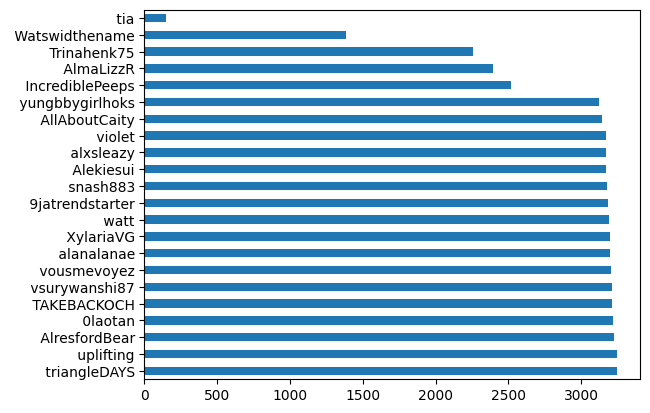

In [305]:
CountStatus = data['username'].value_counts()
CountStatus
CountStatus.plot.barh()

In [306]:
#Remove time step and index column
data.drop(data.columns[[0,1]],axis=1,inplace=True)

In [307]:
# Create word count and character count lists
word_count, char_count, ave_length =  getTextMetaInformation(data,"raw_text")

In [308]:
print("Word count statistics")
get_stats(word_count)

Word count statistics
Min: 1
Max: 61
Mean: 10.943599834957311
Median 10.0
1st percentile 2.0
95th percentile 23.0
99th percentile 27.0
99.5th Percentile 28.0
99.9th Percentile 30.0


C:\Users\leobl\AppData\Local\Temp\ipykernel_1056\2979145052.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(array, kde = False, bins = 70, color = 'blue').set_title(title)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


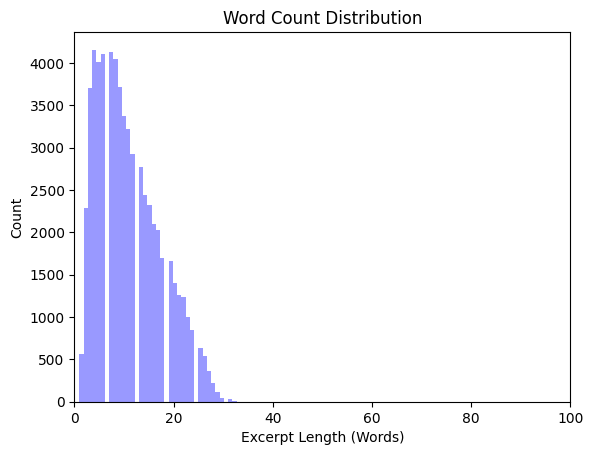

In [309]:
# Plot word count distribution
plot_snsplot(word_count,"Word Count Distribution",'Excerpt Length (Words)','Count',"word_count.eps")


In [310]:
print("\nCharacter count statistics")
get_stats(char_count)


Character count statistics
Min: 2
Max: 177
Mean: 74.66637572602913
Median 68.0
1st percentile 11.0
95th percentile 141.0
99th percentile 145.0
99.5th Percentile 145.0
99.9th Percentile 149.0


C:\Users\leobl\AppData\Local\Temp\ipykernel_1056\2979145052.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(array, kde = False, bins = 70, color = 'blue').set_title(title)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


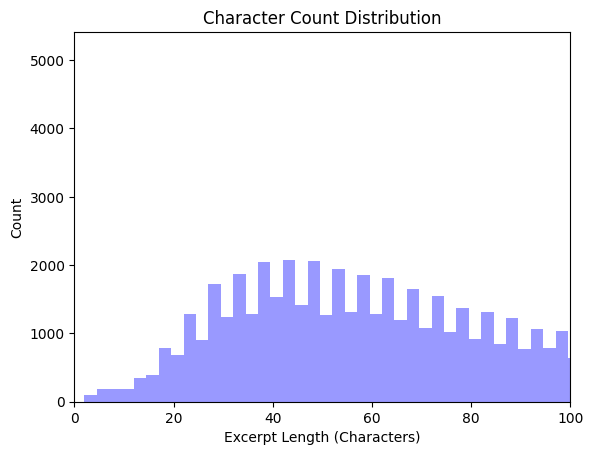

In [311]:
# Plot character count distribution
plot_snsplot(char_count,"Character Count Distribution",'Excerpt Length (Characters)','Count',"char_count.eps")

In [312]:
print("\nAverage length statistics")
get_stats(ave_length)


Average length statistics
Min: 2.0
Max: 55.0
Mean: 7.460682535369352
Median 6.833333333333333
1st percentile 4.111111111111111
95th percentile 12.4
99th percentile 17.0
99.5th Percentile 19.655833333332946
99.9th Percentile 24.493500000004133


C:\Users\leobl\AppData\Local\Temp\ipykernel_1056\2979145052.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(array, kde = False, bins = 70, color = 'blue').set_title(title)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


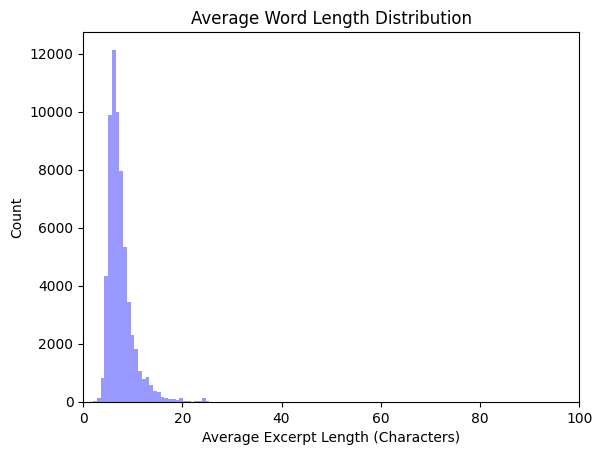

In [313]:
plot_snsplot(ave_length,"Average Word Length Distribution",'Average Excerpt Length (Characters)','Count',"ave_length.eps")

In [314]:
#Get text indexes with short word count 
short_word_count_outliers = get_outlier_indexes(word_count, 5, "less")
for i in short_word_count_outliers[0]:
    print("Excerpt {} - Length: {}".format(i, word_count[i]))
    print(text[i], "\n")

Excerpt 0 - Length: 3
 "RT @vxrnvn: Ma'am 

Excerpt 6 - Length: 1
 "son 

Excerpt 7 - Length: 3
 "RT @jackdre02: Bro 

Excerpt 13 - Length: 2
 this. https://t.co/WiUKzhqXp1 

Excerpt 15 - Length: 2
 lol. https://t.co/SHvyAPP6Rf 

Excerpt 23 - Length: 2
 Unfortunate. https://t.co/dxUbUNeqPv 

Excerpt 55 - Length: 2
 Hala Madrid! 

Excerpt 68 - Length: 4
 "Your MCM said Kante 

Excerpt 72 - Length: 4
 someone finally notices. https://t.co/945wYrs6At 

Excerpt 76 - Length: 1
 "Ronaldo 

Excerpt 79 - Length: 3
 "RT @Nigerianscamsss: Instead 

Excerpt 85 - Length: 3
 "RT @femibakre: #UCLFinal 

Excerpt 87 - Length: 4
 """The better BBC"" FC." 

Excerpt 89 - Length: 2
 #KBNueve! #HalaMadrid! 

Excerpt 102 - Length: 4
 RT @TheKeshKid: 😂 https://t.co/nxMIbP7Tdv 

Excerpt 117 - Length: 2
 @TheMayowaAbiru https://t.co/DtVmit5p2V 

Excerpt 118 - Length: 3
 so beautiful. https://t.co/zKmaL0apMa 

Excerpt 120 - Length: 4
 "RT @OfficialSkinny1: United fans 

Excerpt 122 - Length: 4
 RT @DrewskieC: H

In [315]:
#Get text indexes with long word count 
long_word_count_outliers = get_outlier_indexes(word_count, 35, "greater")
for i in long_word_count_outliers[0]:
    print("Excerpt {} - Length: {}".format(i, word_count[i]))
    print(text[i], "\n")

Excerpt 45184 - Length: 61
 RT @GUNNERSELLWHITE: w h y e v e r y o n e i n t h e m i g o s w r i t e t h e y i n s t a g r a m c a p t i o n s l i k e t h i s n i g g… 

Excerpt 48831 - Length: 36
 RT @em2ay: 여러분 저 진기 찍었어요 여러분 저 세미막콘 끝나고 계속 기다리다가 방금 찍었어요 아티움 종현이 영상 혼자 넋놓고 보다가 뒤늦게 찍어서 뒷모습밖에 없는데 얼굴 가리고 가는거 왜케 귀여워요? 아니 저 앞모습도 봤는데 진짜 잘생김 미… 



In [ ]:
#Word outliers
word_count_outliers = np.append(short_word_count_outliers, long_word_count_outliers)

In [ ]:
# Get long word length outliers
long_word_length_outliers = get_outlier_indexes(ave_length, 23, "greater")
for i in long_word_length_outliers[0]:
    print("Excerpt {} - Average Length: {}".format(i, ave_length[i]))
    print(text[i], "\n")

In [ ]:
# Get short word length outliers
short_word_length_outliers = get_outlier_indexes(ave_length, 3.5, "less")
for i in short_word_length_outliers[0]:
    print("Excerpt {} - Average Length: {}".format(i, ave_length[i]))
    print(text[i], "\n")

In [ ]:
word_length_outliers = np.append(short_word_length_outliers, long_word_length_outliers)

In [67]:
#Drop word count outliers
data=data.drop(data.index[word_count_outliers])

In [ ]:
#Drop word length outliers
data=data.drop(data.index[word_length_outliers])

In [ ]:
# print all unique all excerpts in lower case
print_unique_character_counts(text)

In [256]:
# Create list of accented characters
accented_chars = ['ï', 'é', 'ñ', 'è', 'ö', 'æ', 'ô', 'â', 'á', 'à', 'ê', 'ë']
accented_text = find_character_list_count(text,accented_chars)

There are 351 texts containing the characters provided.


In [ ]:
# Print accented texts
for i in accented_text:
    print("Excerpt {}".format(i))
    print(text[i] + '\n')

In [275]:
# Remove invalid character from text
text = remove_character_from_text(text,accented_chars)

In [258]:
# Remove blocks of white space
text = remove_block_of_white_space(text)

63019


In [316]:
count_text_with_string(data["raw_text"],"RT")

35783

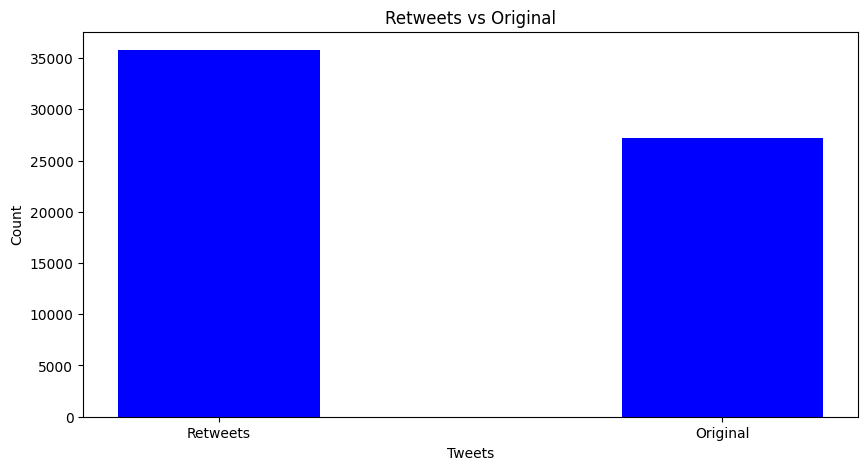

In [274]:
# creating the dataset
info = {'Retweets':data["raw_text"].str.count("RT").sum(), 'Original':len(data)-data["raw_text"].str.count("RT").sum()}
courses = list(info.keys())
values = list(info.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Tweets")
plt.ylabel("Count")
plt.title("Retweets vs Original")
plt.show()

In [317]:
df = remove_text_with_substring(data,data["raw_text"],"RT")

In [318]:
text = df["raw_text"]

In [319]:
len(df)

27872

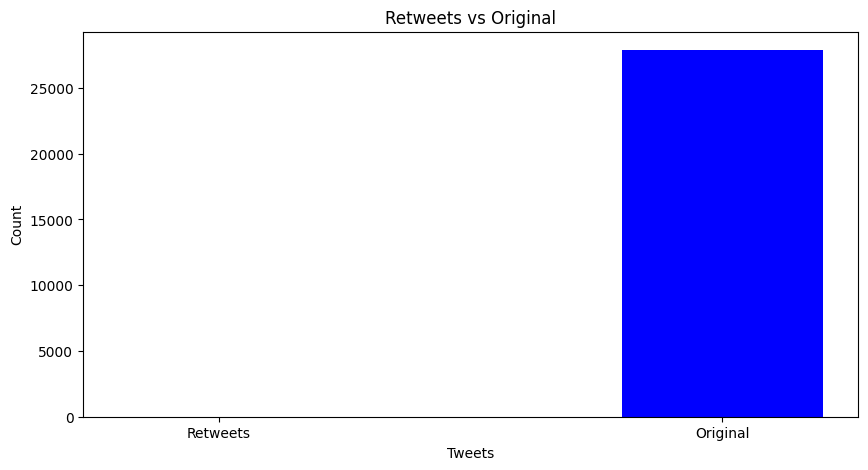

In [320]:
# creating the dataset
info = {'Retweets':df["raw_text"].str.count("RT").sum(), 'Original':len(df)-df["raw_text"].str.count("RT").sum()}
courses = list(info.keys())
values = list(info.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Tweets")
plt.ylabel("Count")
plt.title("Retweets vs Original")
plt.show()

In [321]:
#save to excel
df.to_csv("processData.csv")

In [322]:
len(df['username'].value_counts())

22

<AxesSubplot:>

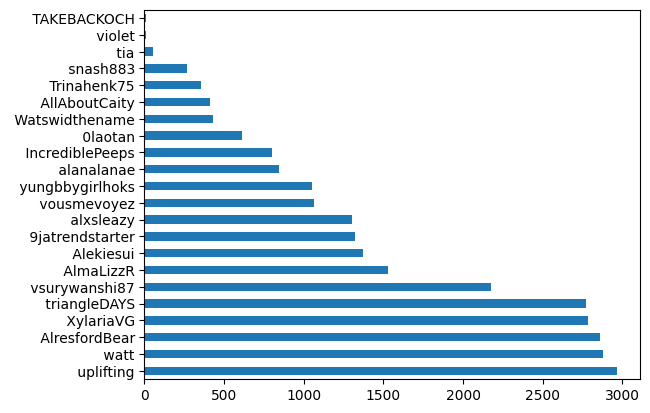

In [128]:
CountStatus = df['username'].value_counts()
CountStatus
CountStatus.plot.barh()